In [50]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import torch
from scipy.linalg import hadamard
from block import block, generators, plot


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


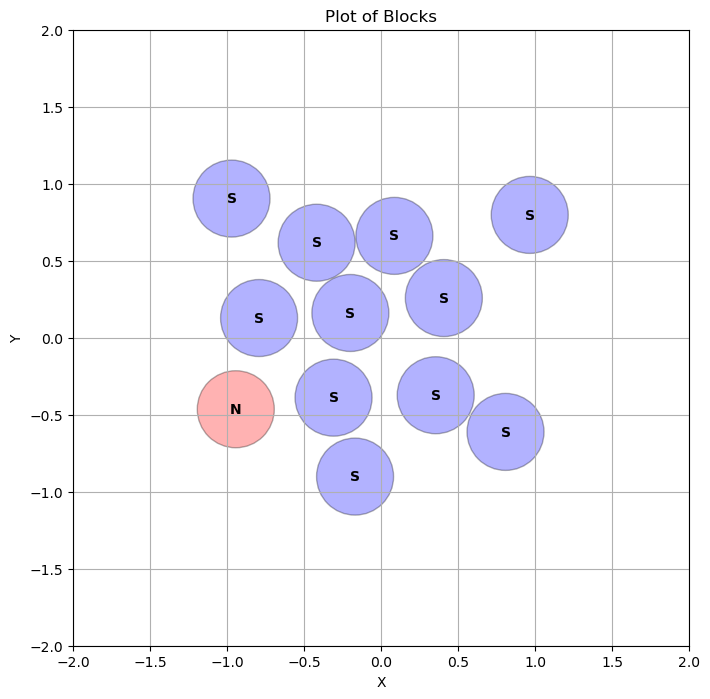

In [52]:
c = generators.gen_rand_block(12, lambda: 0.25)
plot.plot_faces([c])

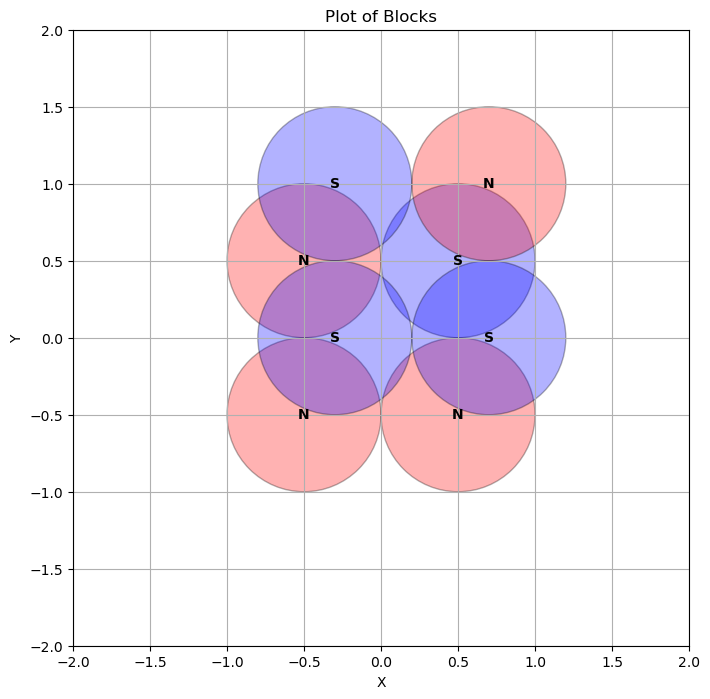

In [75]:
a = generators.gen_had_block(2)
b = a.mate()
b.translate(torch.tensor([0.2, 0.5]))
A, F = block.calculate_attraction(a, b)
plot.plot_faces([a, b])

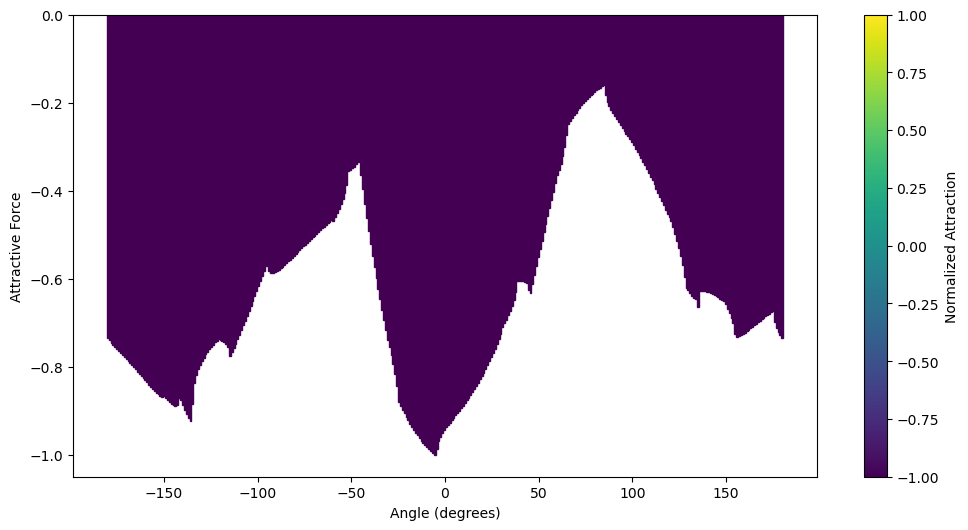

In [76]:
plot.plot_rotation_attraction(a,b, num_angles=360)